01 Import Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [3]:
# Set graphs for auto display
%matplotlib inline

In [4]:
path = r'/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 6'

In [5]:
df = pd.read_csv(os.path.join(path, 'Cleaned_data.csv'))

In [6]:
#check output
df.head()

,Unnamed: 0,Entity,Code,Year,"Country, Year",Schizophrenia_percent,Bipolar_percent,Eating_percent,Anxiety_percent,Drug_percent,...,Age 50-69,Age 70+,Age 15-49,Age Standardized,Males_percent,Females_percent,Population,Suicide_deaths_per_100K,Depression_per_100K,Number with depression
0,0,Afghanistan,AFG,1990,"Afghanistan, 1990",0.160560,0.697779,0.101855,4.828830,1.677082,...,5.917752,5.202803,4.939766,4.071831,3.499982,4.647815,12412000,10.318504,4039.755763,318435.8137
1,1,Afghanistan,AFG,1991,"Afghanistan, 1991",0.160312,0.697961,0.099313,4.829740,1.684746,...,5.927093,5.192849,4.902682,4.079531,3.503947,4.655772,13299000,10.327010,4046.256034,329044.7740
2,2,Afghanistan,AFG,1992,"Afghanistan, 1992",0.160135,0.698107,0.096692,4.831108,1.694334,...,5.945656,5.176872,4.837097,4.088358,3.508912,4.662066,14486000,10.271411,4053.709902,382544.5729
3,3,Afghanistan,AFG,1993,"Afghanistan, 1993",0.160037,0.698257,0.094336,4.830864,1.705320,...,5.966915,5.167355,4.813657,4.096190,3.513429,4.669012,15817000,10.376123,4060.203474,440381.5074
4,4,Afghanistan,AFG,1994,"Afghanistan, 1994",0.160022,0.698469,0.092439,4.829423,1.716069,...,5.975907,5.157549,4.839340,4.099582,3.515578,4.673050,17076000,10.575915,4062.290365,456916.6455


In [7]:
df.head()

,Unnamed: 0,Entity,Code,Year,"Country, Year",Schizophrenia_percent,Bipolar_percent,Eating_percent,Anxiety_percent,Drug_percent,...,Age 50-69,Age 70+,Age 15-49,Age Standardized,Males_percent,Females_percent,Population,Suicide_deaths_per_100K,Depression_per_100K,Number with depression
0,0,Afghanistan,AFG,1990,"Afghanistan, 1990",0.160560,0.697779,0.101855,4.828830,1.677082,...,5.917752,5.202803,4.939766,4.071831,3.499982,4.647815,12412000,10.318504,4039.755763,318435.8137
1,1,Afghanistan,AFG,1991,"Afghanistan, 1991",0.160312,0.697961,0.099313,4.829740,1.684746,...,5.927093,5.192849,4.902682,4.079531,3.503947,4.655772,13299000,10.327010,4046.256034,329044.7740
2,2,Afghanistan,AFG,1992,"Afghanistan, 1992",0.160135,0.698107,0.096692,4.831108,1.694334,...,5.945656,5.176872,4.837097,4.088358,3.508912,4.662066,14486000,10.271411,4053.709902,382544.5729
3,3,Afghanistan,AFG,1993,"Afghanistan, 1993",0.160037,0.698257,0.094336,4.830864,1.705320,...,5.966915,5.167355,4.813657,4.096190,3.513429,4.669012,15817000,10.376123,4060.203474,440381.5074
4,4,Afghanistan,AFG,1994,"Afghanistan, 1994",0.160022,0.698469,0.092439,4.829423,1.716069,...,5.975907,5.157549,4.839340,4.099582,3.515578,4.673050,17076000,10.575915,4062.290365,456916.6455


In [8]:
df.shape

(6468, 28)

In [9]:
df.columns

Index(['Unnamed: 0', 'Entity', 'Code', 'Year', 'Country, Year',
       'Schizophrenia_percent', 'Bipolar_percent', 'Eating_percent',
       'Anxiety_percent', 'Drug_percent', 'Depression_percent',
       'Alcohol_percent', 'All Ages', 'Age 10-14', 'Age 15-19', 'Age 20-24',
       'Age 25-29', 'Age 30-34', 'Age 50-69', 'Age 70+', 'Age 15-49',
       'Age Standardized', 'Males_percent', 'Females_percent', 'Population',
       'Suicide_deaths_per_100K', 'Depression_per_100K',
       'Number with depression'],
      dtype='object')

In [10]:
df['Depression_percent'].mean()

3.497653585657081

In [11]:
#remove categorical variables
df.drop(['Unnamed: 0', 'Entity', 'Code', 'Year', 'Country, Year'], axis=1, inplace=True)

In [12]:
#check output
df.columns

Index(['Schizophrenia_percent', 'Bipolar_percent', 'Eating_percent',
       'Anxiety_percent', 'Drug_percent', 'Depression_percent',
       'Alcohol_percent', 'All Ages', 'Age 10-14', 'Age 15-19', 'Age 20-24',
       'Age 25-29', 'Age 30-34', 'Age 50-69', 'Age 70+', 'Age 15-49',
       'Age Standardized', 'Males_percent', 'Females_percent', 'Population',
       'Suicide_deaths_per_100K', 'Depression_per_100K',
       'Number with depression'],
      dtype='object')

In [13]:
df.shape

(6468, 23)

02 Standardize data

For this step I used Method 3 from the tutorial recommended in the lesson, https://www.geeksforgeeks.org/how-to-standardize-data-in-a-pandas-dataframe/. The transformation step returned an error, but my mentor was able to help.

In [16]:
#import scaler
from sklearn.preprocessing import StandardScaler 

In [17]:
# define standard scaler 
scaler = StandardScaler()

In [18]:
column2 = ['Schizophrenia_percent', 'Bipolar_percent', 'Eating_percent',
       'Anxiety_percent', 'Drug_percent', 'Depression_percent',
       'Alcohol_percent', 'All Ages', 'Age 10-14', 'Age 15-19', 'Age 20-24',
       'Age 25-29', 'Age 30-34', 'Age 50-69', 'Age 70+', 'Age 15-49',
       'Age Standardized', 'Males_percent', 'Females_percent', 'Population',
       'Suicide_deaths_per_100K', 'Depression_per_100K',
       'Number with depression']

In [19]:
# transform data 
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=column2)

In [20]:
#check output
df_scaled

,Schizophrenia_percent,Bipolar_percent,Eating_percent,Anxiety_percent,Drug_percent,Depression_percent,Alcohol_percent,All Ages,Age 10-14,Age 15-19,...,Age 50-69,Age 70+,Age 15-49,Age Standardized,Males_percent,Females_percent,Population,Suicide_deaths_per_100K,Depression_per_100K,Number with depression
0,-1.154457,-0.124527,-0.873613,0.718590,1.768839,0.875527,-1.061845,-0.070887,0.540047,0.442256,...,0.249872,-0.622487,0.953660,0.875527,1.297180,0.584381,-0.101966,-0.217707,1.118277,-0.235791
1,-1.160054,-0.123471,-0.889689,0.719371,1.785477,0.887268,-1.062585,-0.088761,0.524433,0.437795,...,0.259026,-0.629116,0.915342,0.887268,1.304601,0.593850,-0.099945,-0.216649,1.128821,-0.235179
2,-1.164055,-0.122618,-0.906265,0.720542,1.806291,0.900728,-1.063891,-0.143195,0.498803,0.418098,...,0.277219,-0.639756,0.847575,0.900728,1.313893,0.601340,-0.097241,-0.223566,1.140911,-0.232094
3,-1.166257,-0.121744,-0.921164,0.720333,1.830142,0.912670,-1.064945,-0.184861,0.496879,0.400880,...,0.298053,-0.646094,0.823354,0.912670,1.322347,0.609608,-0.094209,-0.210538,1.151444,-0.228759
4,-1.166598,-0.120507,-0.933156,0.719099,1.853475,0.917842,-1.065501,-0.229509,0.481180,0.406721,...,0.306867,-0.652624,0.849892,0.917842,1.326369,0.614413,-0.091342,-0.185679,1.154829,-0.227806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,-1.264964,-0.647836,-0.776268,-0.770708,-0.208400,-0.563368,-0.081585,-1.131852,-0.787809,-0.834843,...,0.017718,0.869868,-0.912354,-0.563368,-0.070594,-0.871975,-0.099829,2.027214,-0.489936,-0.236649
6464,-1.257666,-0.644235,-0.771050,-0.767458,-0.202681,-0.544920,-0.081784,-1.106997,-0.783048,-0.826084,...,0.043436,0.879325,-0.892050,-0.544920,-0.053923,-0.855828,-0.099289,1.933194,-0.475772,-0.236182
6465,-1.246988,-0.639850,-0.762215,-0.763412,-0.196413,-0.521408,-0.082619,-1.076596,-0.775780,-0.817351,...,0.064231,0.887104,-0.865468,-0.521408,-0.033239,-0.834825,-0.098770,1.882369,-0.457517,-0.235664
6466,-1.232396,-0.634770,-0.749656,-0.758609,-0.195387,-0.493315,-0.084342,-1.040589,-0.758936,-0.808240,...,0.099305,0.895312,-0.837620,-0.493315,-0.014231,-0.806561,-0.098280,1.837892,-0.435568,-0.235099


03 Find number of clusters using elbow technique

In [22]:
#Define range and clusters
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [23]:
# Creates a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] 
score

[-148763.99999999994,
 -101783.96781764171,
 -81554.87658700944,
 -70351.0052771668,
 -64149.432052459655,
 -54153.7411384923,
 -56899.763268731585,
 -46508.7102268592,
 -41758.87398641049]

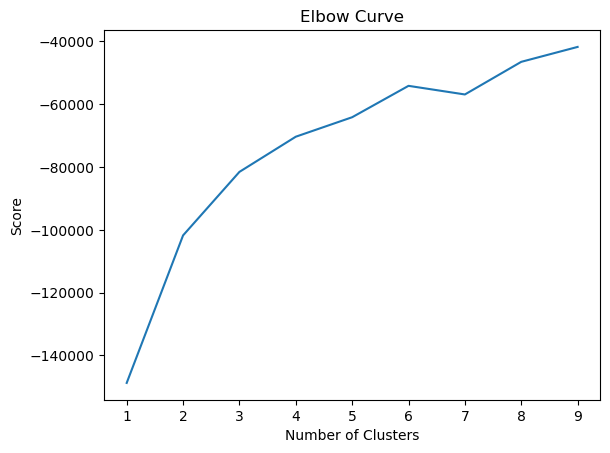

In [24]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

CLUSTER CHOICE: I have chosen to work with three clusters. I tried two, three, and four, and three gave me the most useful information.

04 Run K-Means Algorithm

In [27]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [28]:
# Fit the k-means object to the data.

kmeans.fit(df_scaled)

KMeans(n_clusters=3)

In [29]:
#create columns corresponding to clusters
#my mentor helped with the syntax here

df['clusters'] = kmeans.fit_predict(df_scaled)

In [30]:
df.head()

,Schizophrenia_percent,Bipolar_percent,Eating_percent,Anxiety_percent,Drug_percent,Depression_percent,Alcohol_percent,All Ages,Age 10-14,Age 15-19,...,Age 70+,Age 15-49,Age Standardized,Males_percent,Females_percent,Population,Suicide_deaths_per_100K,Depression_per_100K,Number with depression,clusters
0,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,3.218871,1.594676,3.455708,...,5.202803,4.939766,4.071831,3.499982,4.647815,12412000,10.318504,4039.755763,318435.8137,1
1,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,3.203468,1.588356,3.451880,...,5.192849,4.902682,4.079531,3.503947,4.655772,13299000,10.327010,4046.256034,329044.7740,1
2,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,3.156559,1.577980,3.434982,...,5.176872,4.837097,4.088358,3.508912,4.662066,14486000,10.271411,4053.709902,382544.5729,1
3,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,3.120655,1.577201,3.420210,...,5.167355,4.813657,4.096190,3.513429,4.669012,15817000,10.376123,4060.203474,440381.5074,1
4,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,3.082179,1.570846,3.425222,...,5.157549,4.839340,4.099582,3.515578,4.673050,17076000,10.575915,4062.290365,456916.6455,1


In [31]:
df['clusters'].value_counts()

clusters
0    2605
2    2069
1    1794
Name: count, dtype: int64

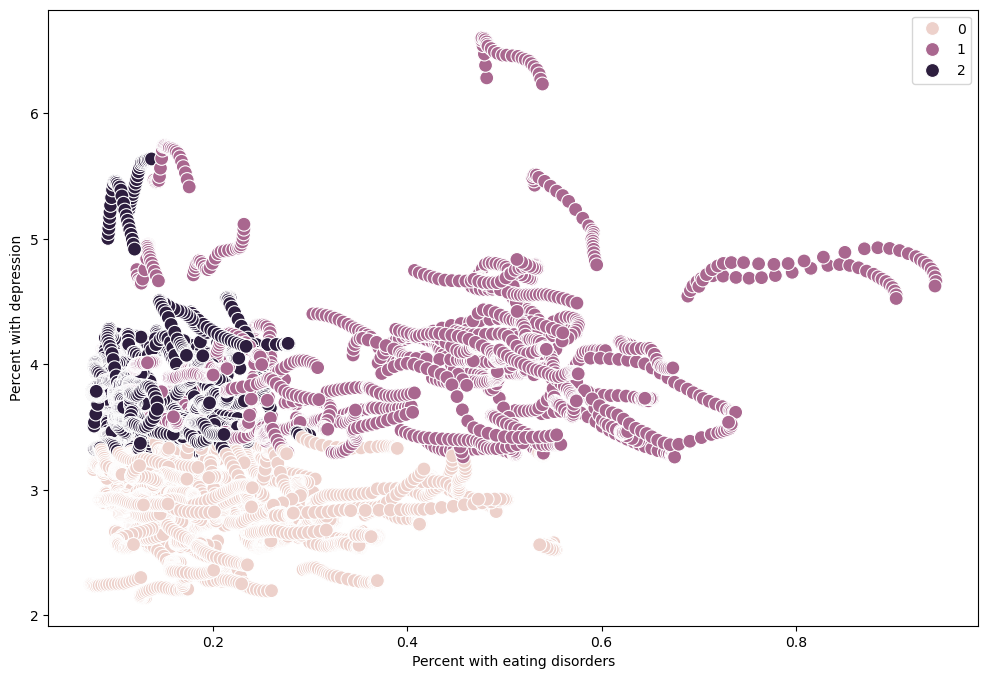

In [32]:
# Plot the clusters for eating disorders and depression.
#In the previous exercise, eating disorders had the most correlations with other mental illnesses.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Eating_percent'], y=df['Depression_percent'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percent with eating disorders') # Label x-axis.
plt.ylabel('Percent with depression') # Label y-axis.
plt.show()

COMMENTARY: There are three logical clusters here. One has a low incidence of eating disorders and a low incidence of depression. One has less eating disorders and more depression. The third has high counts of both. This is a useful way to look at the data because we can look more granually at what makes a country and year show up where.

05 Create Visualizations for Other Value Pairs

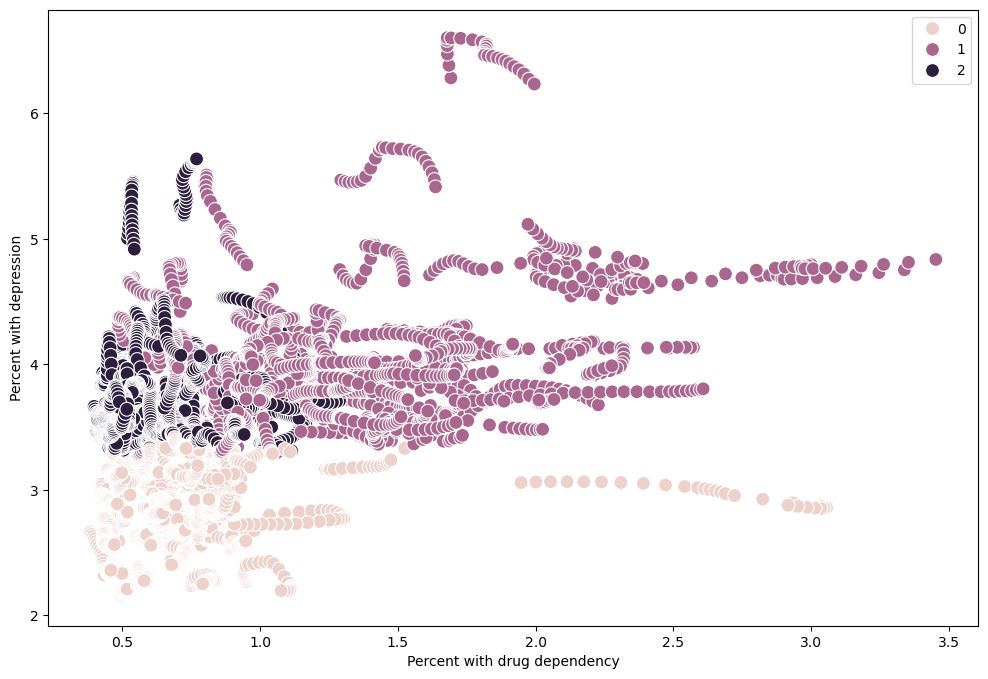

In [35]:
# Plot the clusters for drug dependencies and depression.
# Pair map showed a connection between the two.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Drug_percent'], y=df['Depression_percent'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percent with drug dependency') # Label x-axis.
plt.ylabel('Percent with depression') # Label y-axis.
plt.show()

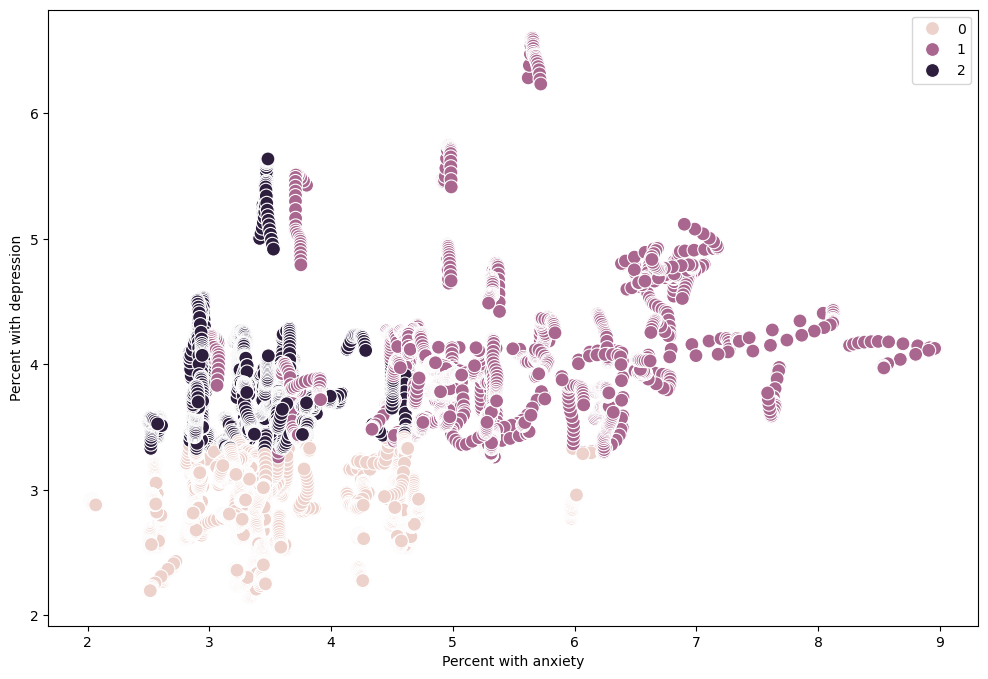

In [36]:
# Plot the clusters for anxiety and depression.
# Heat map showed a moderate connection between the two.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Anxiety_percent'], y=df['Depression_percent'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percent with anxiety') # Label x-axis.
plt.ylabel('Percent with depression') # Label y-axis.
plt.show()

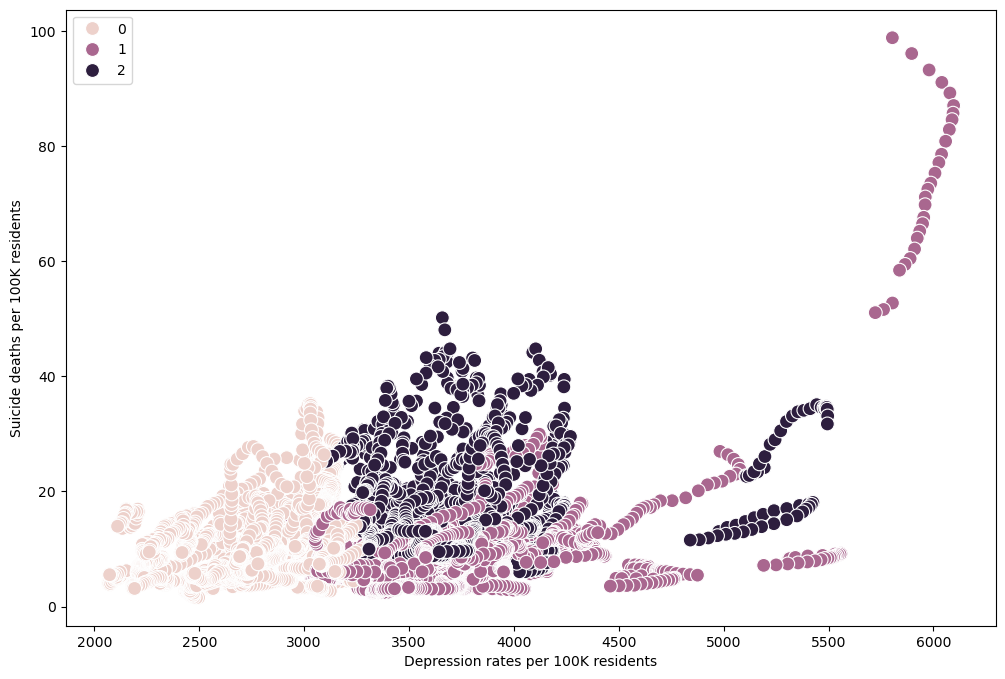

In [37]:
#Plot clusters for depression per 100K and suicide rates
#Prior analysis showed a potential connection. I would like to cluster this to get a better idea of that connection.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Depression_per_100K'], y=df['Suicide_deaths_per_100K'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Depression rates per 100K residents') # Label x-axis.
plt.ylabel('Suicide deaths per 100K residents') # Label y-axis.
plt.show()

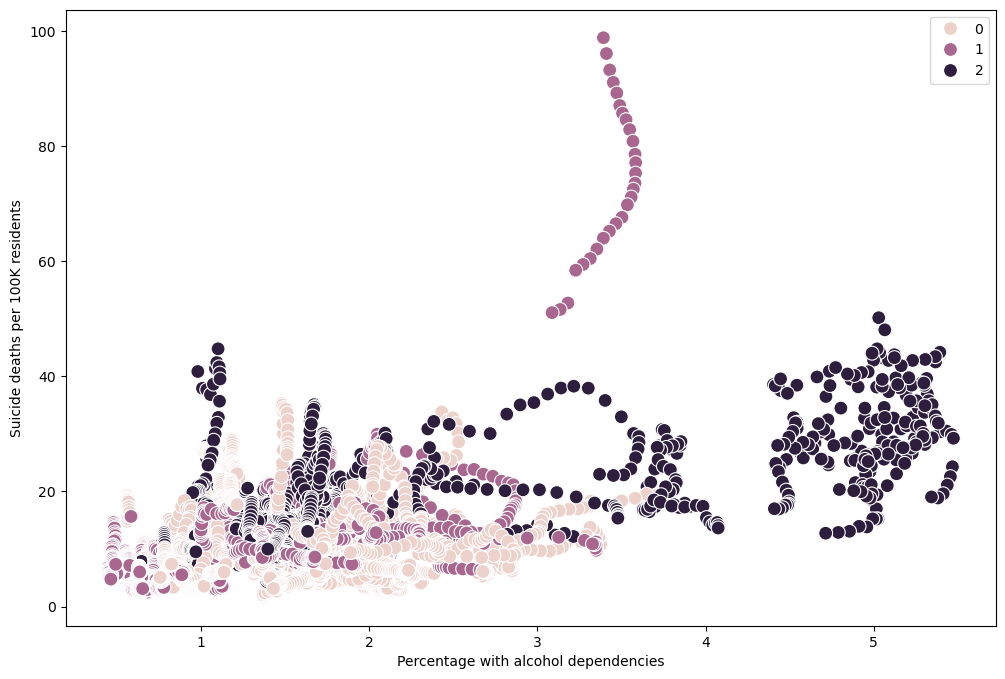

In [38]:
#Plot clusters for alcohol dependence and suicide rates
#Heat map showed a correlation that may be relevant

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Alcohol_percent'], y=df['Suicide_deaths_per_100K'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percentage with alcohol dependencies') # Label x-axis.
plt.ylabel('Suicide deaths per 100K residents') # Label y-axis.
plt.show()

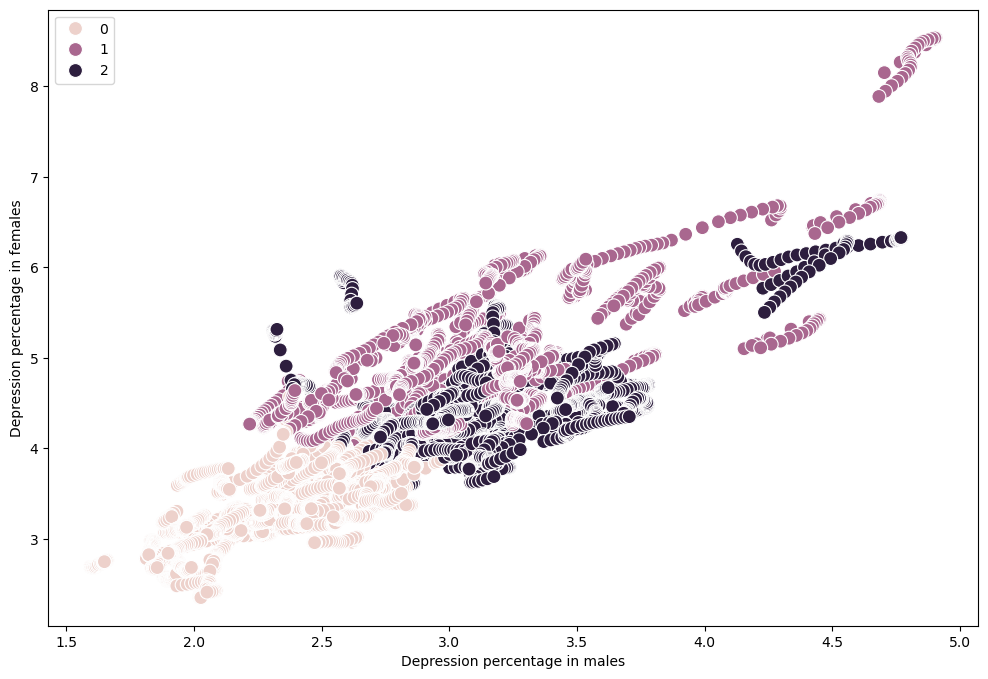

In [39]:
#Plot clusters for depression in males and depression in females
#Have yet to look at that area of the data

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Males_percent'], y=df['Females_percent'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Depression percentage in males') # Label x-axis.
plt.ylabel('Depression percentage in females') # Label y-axis.
plt.show()

COMMENTARY: Clusters show up similarly in these scatterplots: 0 is Low-low, 1 is Low-medium/high, and 2 is High/high. The most notable exception is alcohol/suicide, where the two higher clusters are spread more broadly, including into the lower ranges. It's possible this connection does not have valuable insights to offer.

Also, I'm seeing some overlap in clusters 1 and 2 for the depression-suicide connection. Cluster 2 shows up more as higher depression, low suicide, though there are some outliers that are high-high. Again, I'm not seeing a clear linear trend, but that connection might be worth exploring. It seems that higher depression rates correlate with lower suicides in some places and years. 

06 Calculate descriptive statistics by cluster

In [42]:
#Get baseline and potential aggregated data to check
df.describe()

,Schizophrenia_percent,Bipolar_percent,Eating_percent,Anxiety_percent,Drug_percent,Depression_percent,Alcohol_percent,All Ages,Age 10-14,Age 15-19,...,Age 70+,Age 15-49,Age Standardized,Males_percent,Females_percent,Population,Suicide_deaths_per_100K,Depression_per_100K,Number with depression,clusters
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6.468000e+03,6468.000000,6468.000000,6.468000e+03,6468.000000
mean,0.211644,0.719145,0.239998,3.989921,0.862278,3.497654,1.585821,3.279958,1.376053,3.076291,...,6.137538,4.016824,3.497654,2.806911,4.156787,5.717406e+07,12.068240,3350.318288,4.407362e+06,0.917130
std,0.044253,0.171589,0.158141,1.167526,0.460679,0.655859,0.860283,0.861814,0.404854,0.857978,...,1.501730,0.967864,0.655859,0.534332,0.840319,4.390243e+08,8.037739,616.565210,1.734265e+07,0.846096
min,0.146902,0.314535,0.073908,2.023393,0.383650,2.139903,0.446940,1.805876,0.710318,1.497964,...,3.249315,2.177050,2.139903,1.594129,2.348094,0.000000e+00,1.526792,2065.451870,9.307216e+02,0.000000
25%,0.181530,0.615532,0.122387,3.188824,0.535064,3.005529,0.993685,2.609811,1.066155,2.529356,...,4.874158,3.316308,3.005529,2.412512,3.539870,3.437500e+05,6.741737,2885.327905,7.390368e+04,0.000000
50%,0.199563,0.693134,0.182525,3.554373,0.726430,3.499606,1.479937,3.031299,1.259560,2.895936,...,5.928127,3.850302,3.499606,2.779003,4.199842,4.753000e+06,10.668531,3353.253199,2.776452e+05,1.000000
75%,0.236365,0.835063,0.292666,4.682163,0.940157,3.912381,1.867834,3.793446,1.589738,3.415008,...,7.361696,4.597567,3.912381,3.138412,4.649112,1.800525e+07,14.742472,3739.782595,1.313348e+06,2.000000
max,0.375110,1.206597,0.943991,8.967330,3.452476,6.602754,5.474668,6.990122,3.303273,9.053459,...,11.531880,9.626314,6.602754,4.905163,8.537801,7.547859e+09,98.831696,6096.437594,2.644556e+08,2.000000


In [43]:
#Find mean for each cluster
df.groupby(['clusters']).mean()

,Schizophrenia_percent,Bipolar_percent,Eating_percent,Anxiety_percent,Drug_percent,Depression_percent,Alcohol_percent,All Ages,Age 10-14,Age 15-19,...,Age 50-69,Age 70+,Age 15-49,Age Standardized,Males_percent,Females_percent,Population,Suicide_deaths_per_100K,Depression_per_100K,Number with depression
clusters,,,,,,,,,,,,,,,,,,,,,
0,0.208643,0.687027,0.205540,3.537590,0.720519,2.881092,1.588720,2.745585,1.091865,2.477390,...,4.985366,5.505496,3.192132,2.881092,2.351249,3.378697,1.575148e+07,10.014037,2772.465813,2.120012e+06
1,0.242254,0.881888,0.406717,5.440441,1.348300,4.042377,1.313363,4.165222,1.861594,3.954942,...,5.446236,5.051692,5.103140,4.042377,3.111682,4.966614,2.665758e+07,10.503766,3770.384026,3.120419e+06
2,0.188880,0.618472,0.138825,3.301710,0.619339,3.801622,1.818417,3.185167,1.312858,3.068479,...,6.703492,7.874841,4.113233,3.801622,3.116357,4.434262,1.357881e+08,16.011143,3713.637652,8.403169e+06


In [44]:
#Find median for each cluster
df.groupby(['clusters']).median()

,Schizophrenia_percent,Bipolar_percent,Eating_percent,Anxiety_percent,Drug_percent,Depression_percent,Alcohol_percent,All Ages,Age 10-14,Age 15-19,...,Age 50-69,Age 70+,Age 15-49,Age Standardized,Males_percent,Females_percent,Population,Suicide_deaths_per_100K,Depression_per_100K,Number with depression
clusters,,,,,,,,,,,,,,,,,,,,,
0,0.202567,0.701197,0.180617,3.320248,0.710239,2.906482,1.629147,2.672188,1.060769,2.501926,...,4.877674,5.595298,3.204267,2.906482,2.370360,3.384168,4119000.0,8.263799,2772.259037,159013.83590
1,0.248808,0.853593,0.446588,5.298858,1.291738,3.952506,1.239431,4.144033,1.777214,3.648987,...,5.328729,4.961040,4.918567,3.952506,3.019984,4.801330,5900000.0,9.273996,3694.554686,477591.39345
2,0.172222,0.622411,0.124261,3.283997,0.533039,3.725637,1.481138,2.987317,1.238822,3.009426,...,6.620577,7.784742,3.981668,3.725637,3.062193,4.360648,4464000.0,13.638504,3648.145997,330478.37040


In [45]:
#Find minimum for each cluster
df.groupby(['clusters']).min()

,Schizophrenia_percent,Bipolar_percent,Eating_percent,Anxiety_percent,Drug_percent,Depression_percent,Alcohol_percent,All Ages,Age 10-14,Age 15-19,...,Age 50-69,Age 70+,Age 15-49,Age Standardized,Males_percent,Females_percent,Population,Suicide_deaths_per_100K,Depression_per_100K,Number with depression
clusters,,,,,,,,,,,,,,,,,,,,,
0,0.155312,0.322460,0.073908,2.023393,0.383650,2.139903,0.552453,1.805876,0.710318,1.497964,...,3.248216,3.249315,2.177050,2.139903,1.594129,2.348094,0,1.526792,2065.451870,930.721636
1,0.160022,0.589591,0.086021,3.017264,0.485084,3.260970,0.446940,2.706263,1.125335,2.786860,...,3.808991,3.281971,3.711861,3.260970,2.216915,3.932036,0,2.409898,2934.745660,2162.105162
2,0.146902,0.314535,0.075595,2.503303,0.396884,3.245920,0.644145,2.141864,0.821588,1.966920,...,5.211451,5.105653,3.314404,3.245920,2.309644,3.588918,0,4.340486,3093.573932,1902.101068


In [46]:
#Find maximum for each cluster
df.groupby(['clusters']).max()

,Schizophrenia_percent,Bipolar_percent,Eating_percent,Anxiety_percent,Drug_percent,Depression_percent,Alcohol_percent,All Ages,Age 10-14,Age 15-19,...,Age 50-69,Age 70+,Age 15-49,Age Standardized,Males_percent,Females_percent,Population,Suicide_deaths_per_100K,Depression_per_100K,Number with depression
clusters,,,,,,,,,,,,,,,,,,,,,
0,0.335180,1.105850,0.553168,6.198647,3.059998,3.431446,3.782069,4.142901,2.086298,3.745638,...,6.959826,7.884337,4.294185,3.431446,2.967190,4.567154,264651008,35.264474,3370.607593,7.777883e+07
1,0.375110,1.206597,0.943991,8.967330,3.452476,6.602754,3.583863,6.990122,3.303273,9.053459,...,8.921033,7.581503,9.626314,6.602754,4.905163,8.537801,361942016,98.831696,6096.437594,4.764639e+07
2,0.338174,0.941165,0.299569,4.615156,1.290557,5.636661,5.474668,5.517505,2.674993,5.597110,...,9.777747,11.531880,6.279367,5.636661,4.771281,6.329416,7547858944,50.176333,5496.053129,2.644556e+08


COMMENTS: Cluster 2 has the highest rates of mental illnesses across the board, but not always the highest depression rates per age group. Interestingly, cluster 1 has a significantly higher average suicide rate,  but not a higher max number of suicides. The next step would be to look at the country and year data associated with these clusters and look for differences.

In [85]:
#Export dataframe with clusters
df.to_csv(os.path.join(path, 'Numeric with clusters.csv'))